# Demo 3

> Test Fast.ai models with a simple supervised learning test


In [1]:
# | default_exp demo.demo3

In [1]:
!gpustat

merlin                      Thu Nov 23 12:48:16 2023  525.125.06
[0] NVIDIA GeForce RTX 4090 | 37°C,   0 % |  4208 / 24564 MB |
[1] NVIDIA GeForce RTX 4090 | 39°C,  12 % |   675 / 24564 MB |


In [3]:
#| hide
from nbdev.showdoc import *

%matplotlib inline
from fastai.vision.all import *
from fastai.data.all import *
import torch.nn.functional as F

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from Noise2Model.core import *

from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

In [4]:
bs, size = 4, 512
# arch = models.resnet34
path = Path('../_data/Confocal_BPAE_B/')
path_train_raw = Path(path/"raw")
path_train_gt = Path(path/"gt")

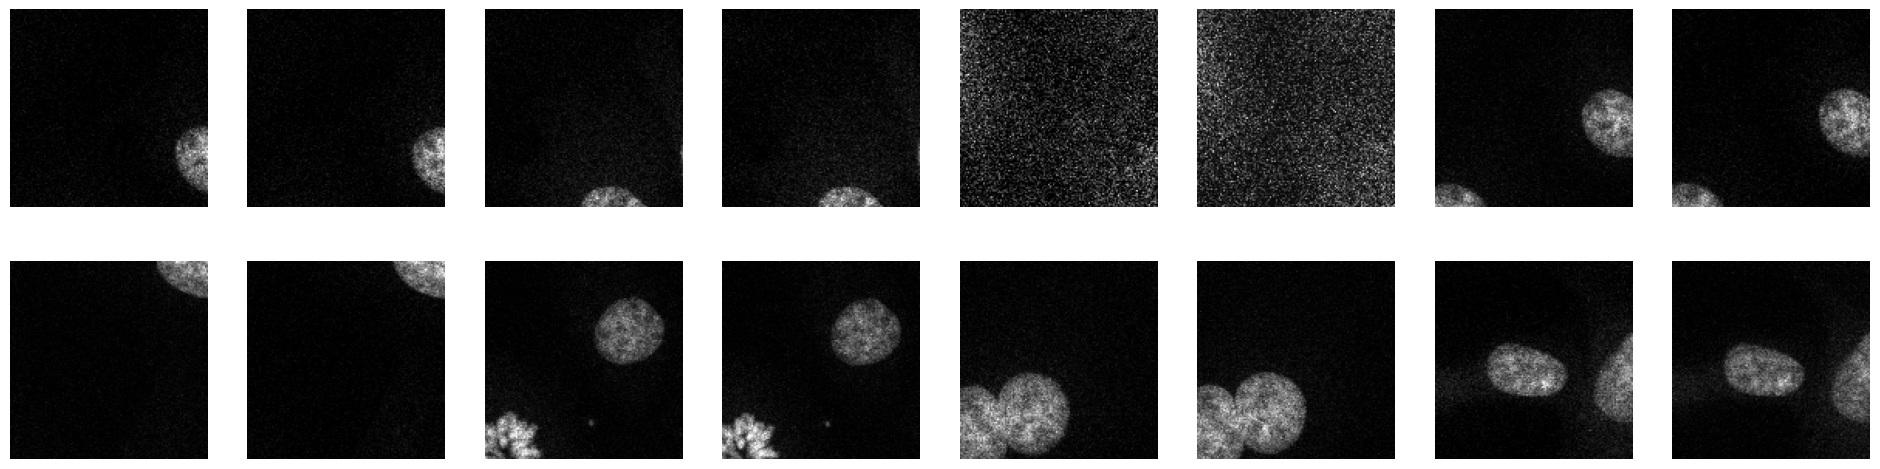

In [5]:
dblock = DataBlock(blocks=(ImageBlock(cls=PILImageBW), ImageBlock(cls=PILImageBW)),
                   get_items=get_image_files,
                   get_y=get_noisy_pair,
                   splitter=RandomSplitter(valid_pct=0.2),
                   item_tfms=RandomCrop(128),
                   )
# dblock.summary(path_train_raw)
# dsets = dblock.datasets(path_train_raw)
# dsets.train[0]
dls = dblock.dataloaders(path_train_raw)
dls.show_batch(max_n=8, cmap='gray')

In [6]:
from Noise2Model.models import UNet

In [7]:
autoencoder = UNet(3)
learn = Learner(dls, autoencoder, loss_func=F.l1_loss)
learn.summary()

UNet (Input shape: 64 x 1 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 32 x 128 x 128 
Conv2d                                    288        True      
BatchNorm2d                               64         True      
ReLU                                                           
Conv2d                                    9216       True      
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________________________________________________
                     64 x 32 x 64 x 64   
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 64 x 64 x 64   
Conv2d                                    18432      True      
BatchNorm2d                               128        True      
ReLU                                     

In [8]:
# learn.show_training_loop()

In [9]:
# learn.lr_find()

In [10]:
# from fastai.callback.tensorboard import *
# layer = learn.model.conv_out
# cbs = [TensorBoardCallback(layer=layer, log_dir=Path('./tmp/runs/vision1', projector=True))] # , ShowGraphCallback()

In [11]:
learn.fit_one_cycle(30, lr_max=1e-03) #, cbs=cbs

epoch,train_loss,valid_loss,time
0,0.098902,0.073213,00:02
1,0.070146,0.035058,00:02
2,0.056123,0.031584,00:02
3,0.046790,0.026138,00:02
4,0.038814,0.021546,00:02
5,0.032897,0.018640,00:02
6,0.028397,0.015680,00:02
7,0.025277,0.014617,00:02
8,0.022682,0.015284,00:02
9,0.020807,0.013682,00:02


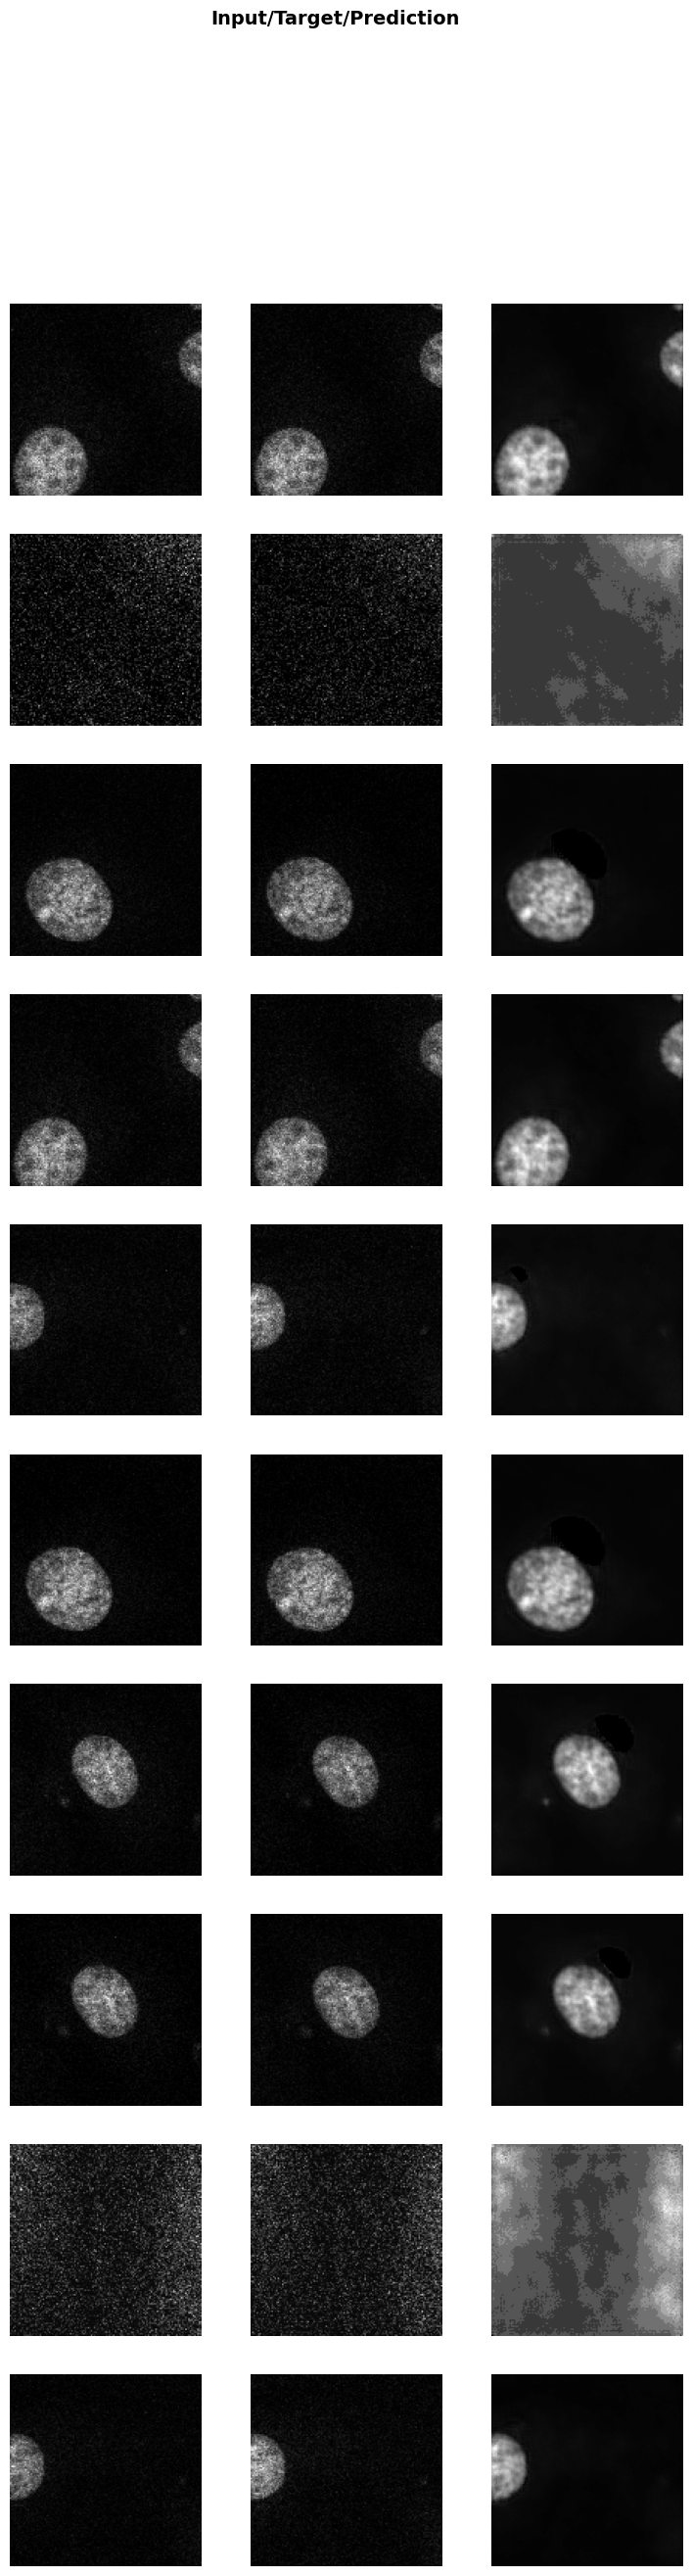

In [12]:
learn.show_results(max_n=10, cmap='gray')

In [13]:
# | hide
import nbdev
nbdev.nbdev_export()